# 引用我入门的三大步骤，学习数据分析
Part1: Exploratory Data Analysis(EDA):

    1)Analysis of the features.

    2)Finding any relations or trends considering multiple features.

Part2: Feature Engineering and Data Cleaning:

    1)Adding any few features.

    2)Removing redundant features.

    3)Converting features into suitable form for modeling.

Part3: Predictive Modeling

    1)Running Basic Algorithms.

    2)Cross Validation.

    3)Ensembling.
    
    4)Important Features Extraction.

## 学习数据分析的思考（译）：
在接触数据之前，您是否指定了数据分析问题的类型(例如探究、关联因果关系)?

在开始之前，你是否定义了衡量成功的标准?
    
您是否理解了问题的上下文以及科学或业务应用程序?

你记录实验设计了吗?

你考虑过这个问题是否可以用现有的数据来回答吗?（泛化能力）

思考和记录我们正在处理的问题是执行经常被忽略的有效数据分析的重要步骤。不要跳过它。

## Part 1 :探索数据分析：分析每列数据的特征，发现数据间的关系以及趋势

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 注意pd.describe()方法只对pd中的数值进行统计(非数值列不会出现)，pd中的所有列还是需要用pd.collums.tolist()查看

In [2]:
data_df=pd.read_csv('data/iris-data.csv')
data_df.info()
#data_df.count()
#data_df.columns.tolist()
#data_df.describe()  #均值、方差、求和...
#data_df.describe   #展示所有数据
data_df.head()    #展示前5条数据


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data_df.isnull().sum()# 看看数据中是否有空值。

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

#### 针对空值我们的处理方法有：drop和fillna
#### 由于列名为class造成了一些冲突，所以将其rename,并进行inplace=True的替换。
对petal_widtha_cm这列数据，可以drop掉空值，也可以采用均值填充。
#data_df.fillna(1,inplace=True)#需要inplace一下

In [4]:
data_df.rename(columns={'class':'Species'},inplace=True)
data_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# data_df=data_df.dropna()

#print(data_df.count())
average_petal_width=data_df.loc[data_df["Species"]=='Iris-setosa','petal_width_cm'].mean()
print(data_df.count())
data_df.loc[(data_df['Species'] == 'Iris-setosa') &(data_df['petal_width_cm'].isnull()),'petal_width_cm'] = average_petal_width
print(data_df.count())

sepal_length_cm    150
sepal_width_cm     150
petal_length_cm    150
petal_width_cm     145
Species            150
dtype: int64
sepal_length_cm    150
sepal_width_cm     150
petal_length_cm    150
petal_width_cm     150
Species            150
dtype: int64


## 认识数据：iris数据是什么数据？有哪些缺陷？我们要对这些数据进行哪些分析操作？
#鸢尾花数据集共收集了三类鸢尾花，即Setosa鸢尾花、Versicolour鸢尾花和Virginica鸢尾花。
#每一类鸢尾花收集了50条样本记录，共计150条,按顺序每50条一组。
#数据中有异常点，有标签错误需要纠正。

In [6]:
data_df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: Species, dtype: int64

#### 对分类数据进行value_counts()，我们只有三类数据，明显发现多了两类数据，需要进行调整
replace中用list进行批量调整

In [7]:
#copy=data_df['class'].replace(['versicolor','Iris-setossa'],['Iris-versicolor','Iris-setosa'],inplace=True)
#type(copy)  #NoneType  加入inplace后返回NoneType
#copy.value_counts()
data_df['Species'].replace(['versicolor','Iris-setossa'],['Iris-versicolor','Iris-setosa'],inplace=True)
data_df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### 再对前列数据进行分析，绘制散点图

#### 一个较差的方法是将数据按索引号提取出来，类型是Serise

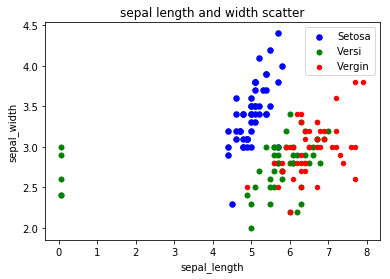

In [8]:
setosa_sepal_len=data_df['sepal_length_cm'][:50]
setosa_sepal_width=data_df['sepal_width_cm'][:50]

versi_sepal_len=data_df['sepal_length_cm'][50:100]
versi_sepal_width=data_df['sepal_width_cm'][50:100]

vergin_sepal_len=data_df['sepal_length_cm'][100:150]
vergin_sepal_width=data_df['sepal_width_cm'][100:150]

plt.scatter(setosa_sepal_len,setosa_sepal_width,marker='o',c='b',s=30,label='Setosa')
plt.scatter(versi_sepal_len,versi_sepal_width,marker='o',c='g',s=25,label='Versi')
plt.scatter(vergin_sepal_len,vergin_sepal_width,marker='o',c='r',s=20,label='Vergin')

plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("sepal length and width scatter")
plt.legend(loc='upper right')

#### 一个较好的方法是根据class取出对应的数据如下：
#### help(pd.DataFrame.plot)
Returns
 |      -------
 |      axes : matplotlib.AxesSubplot or np.array of them
 #将获取到axes命名为fig,就可以在同一个图中进行多次plot了，只需要传入参数ax=fig

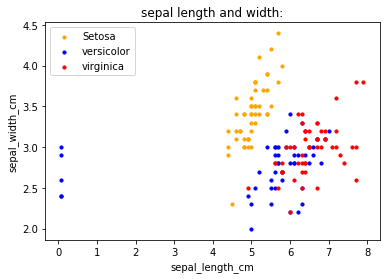

In [9]:
fig=data_df[data_df.Species=='Iris-setosa'].plot(kind='scatter',x='sepal_length_cm',y='sepal_width_cm',s=10,color='orange', label='Setosa')
data_df[data_df.Species=='Iris-versicolor'].plot(kind='scatter',x='sepal_length_cm',y='sepal_width_cm',s=10,color='blue', label='versicolor',ax=fig)
data_df[data_df.Species=='Iris-virginica'].plot(kind='scatter',x='sepal_length_cm',y='sepal_width_cm',s=10,color='red', label='virginica',ax=fig)
plt.legend(loc='upper left')
plt.title("sepal length and width:")
plt.show()

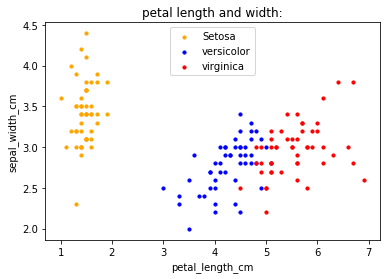

In [10]:
fig=data_df[data_df.Species=='Iris-setosa'].plot(kind='scatter',x='petal_length_cm',y='sepal_width_cm',s=10,color='orange', label='Setosa')
data_df[data_df.Species=='Iris-versicolor'].plot(kind='scatter',x='petal_length_cm',y='sepal_width_cm',s=10,color='blue', label='versicolor',ax=fig)
data_df[data_df.Species=='Iris-virginica'].plot(kind='scatter',x='petal_length_cm',y='sepal_width_cm',s=10,color='red', label='virginica',ax=fig)
plt.legend(loc='upper center')
plt.title("petal length and width:")
plt.show()

### 而更好的绘图方式是通过seaborn绘图。如下所示：

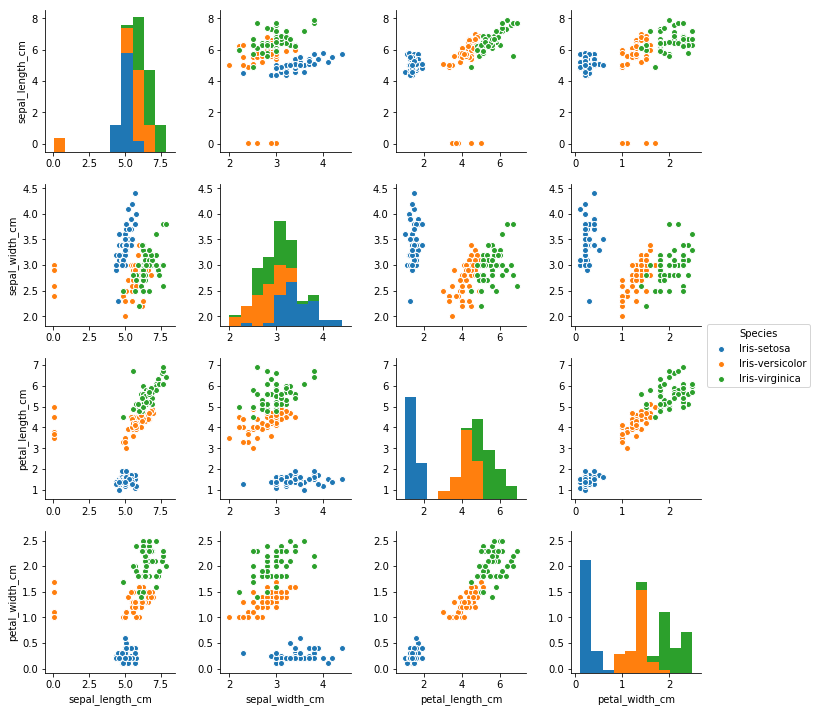

In [11]:
sb.pairplot(data_df, hue='Species')

#### 我们观察到了蓝色的离群点，先对setosa数据的sepal_width下手，从图中观察到它有一个离群点
#This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
#data_df = data_df.loc[(data_df['Species'] != 'Iris-setosa') | (data_df['sepal_width_cm'] >= 2.5)]

''

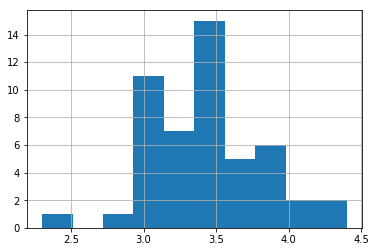

In [12]:
data_df.loc[data_df['Species'] == 'Iris-setosa', 'sepal_width_cm'].hist()
;

#### 去掉离群点

''

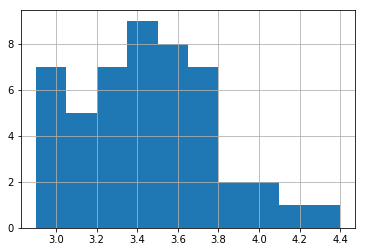

In [13]:
data_df = data_df.loc[(data_df['Species'] != 'Iris-setosa') | (data_df['sepal_width_cm'] >= 2.5)]
data_df.loc[data_df['Species'] == 'Iris-setosa', 'sepal_width_cm'].hist()
;

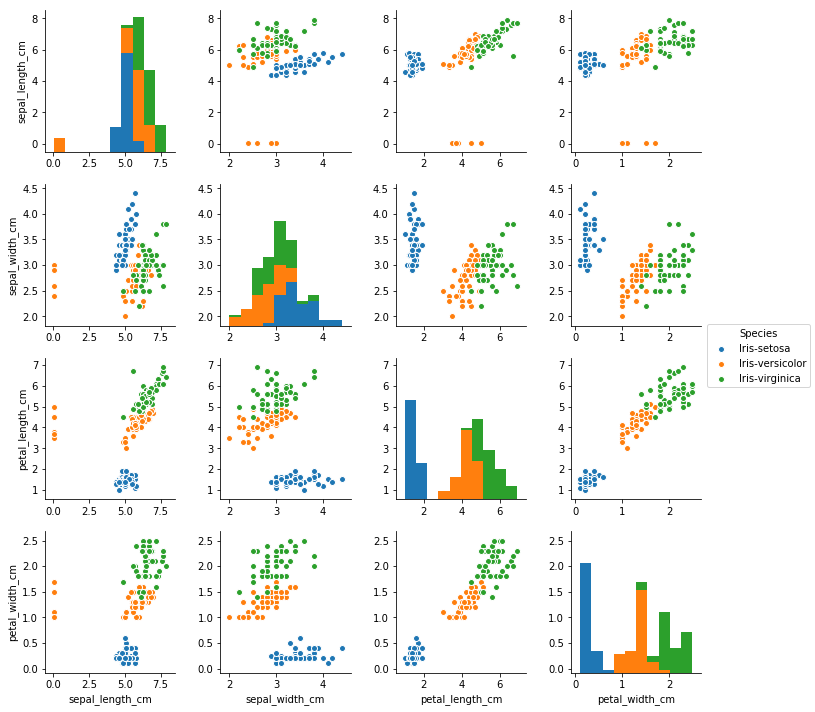

In [14]:
sb.pairplot(data_df, hue='Species')

Excellent! Now all of our Iris-setosa rows have a sepal width greater than 2.5.

The next data issue to address is the several near-zero sepal lengths for the Iris-versicolor rows. Let's take a look at those rows.

#### 很显然，我们观察到了图中黄色离群点，观察到sepal_length数据有异常点，通过以下方式找出来。

In [15]:
data_df[data_df['sepal_length_cm']<1]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Species
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


#由于数据集比较简单，我们很容易判断出sepal_length_cm数据很可能是相差了100倍，
#在数据集本来就较少的情况下，可以根据经验对采集的有误数据作一些合理的调整。

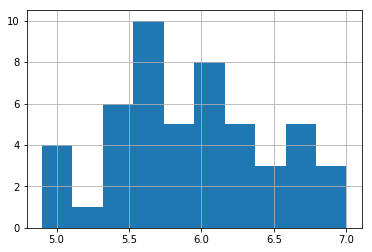

In [16]:
data_df.loc[(data_df['Species']=='Iris-versicolor') & (data_df['sepal_length_cm']<1.0) ,'sepal_length_cm'] *= 100.0
data_df.loc[data_df['Species']=='Iris-versicolor','sepal_length_cm'].hist()

#### 保存清洗后的数据：使用 pd.DataFrame.to_csv(name,index=False) index默认为True表示添加ID那一列进入columns

In [17]:
data_df.to_csv('iris-data-clean.csv', index=False)
iris_data_clean = pd.read_csv('iris-data-clean.csv')

''

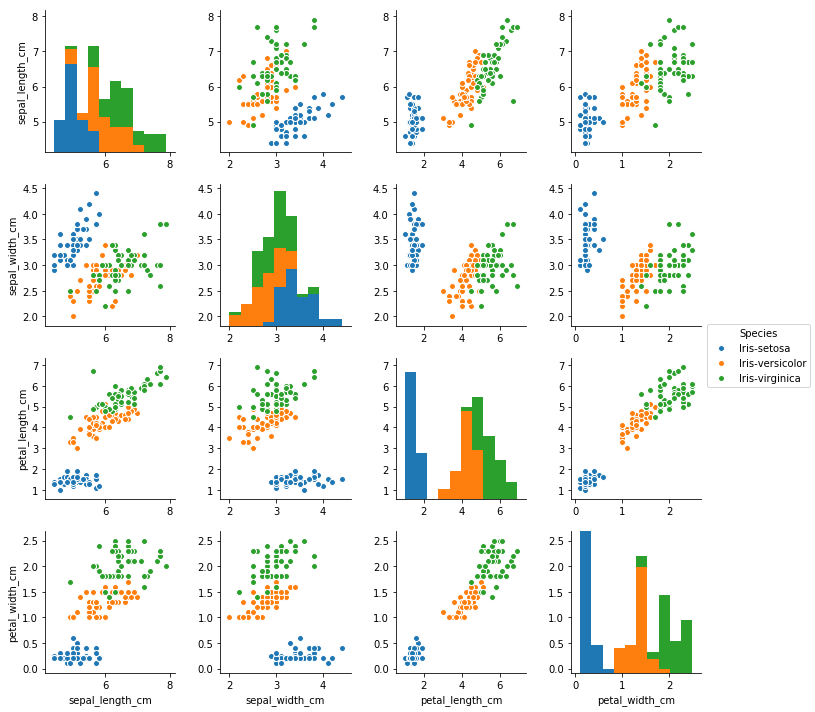

In [18]:
sb.pairplot(iris_data_clean, hue='Species')
;

### Testing our data

In [19]:
# We know that we should only have three classes
assert len(iris_data_clean['Species'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['Species'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

#### 完成数据的清洗后就正式开始对数据进行探索分析了
#### 下图我们的数据分布已经正常了

''

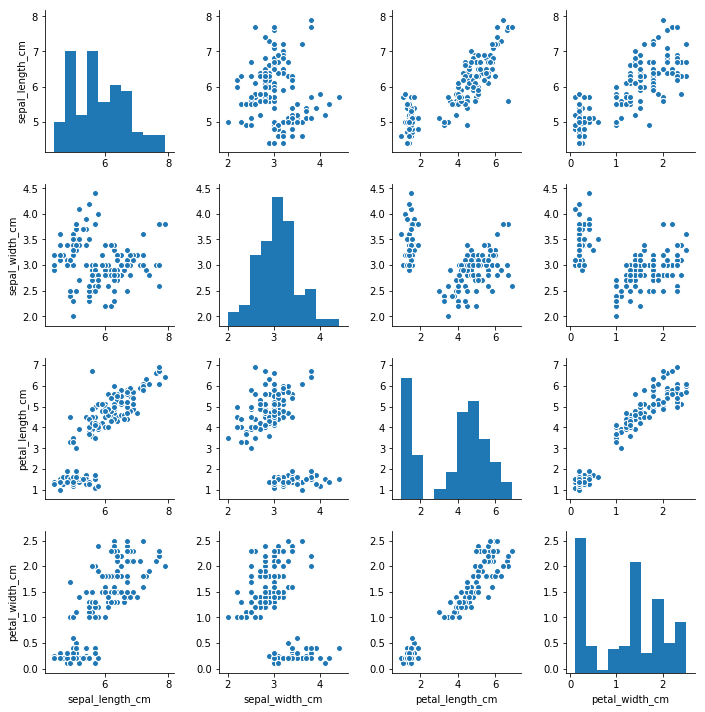

In [20]:
sb.pairplot(iris_data_clean)
;

''

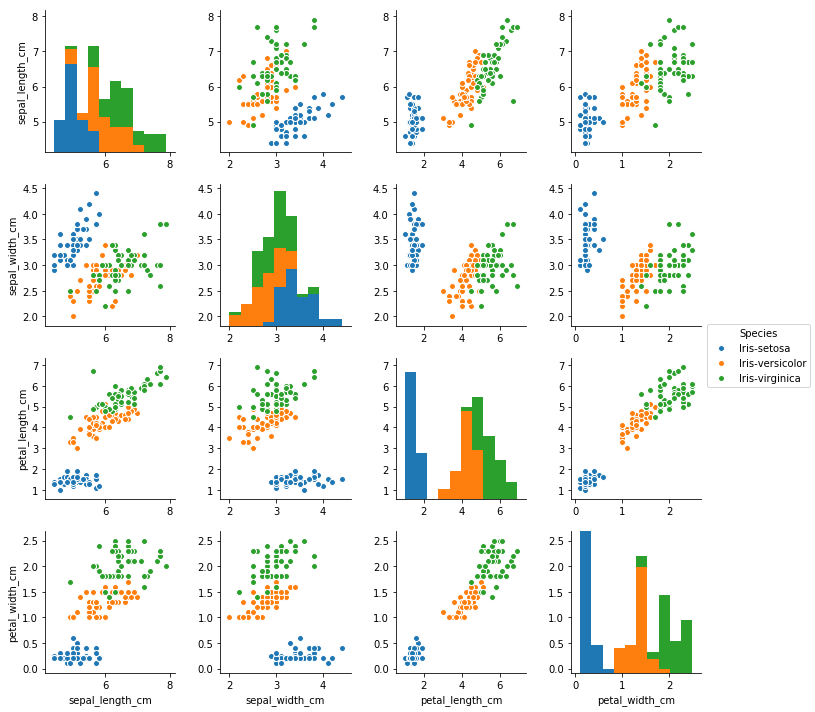

In [21]:
sb.pairplot(iris_data_clean, hue='Species')
;

花瓣尺寸的奇怪分布是由于物种的不同而存在的。这对于我们的分类任务来说是一个好消息，因为这意味着花瓣的尺寸可以很容易地区分鸢尾-濑鱼和其他类型的鸢尾。鉴于鸢尾-versicolor和鸢尾-virginica的测量值有多少重叠，区分它们将变得更加困难。
花瓣长度和花瓣宽度，以及萼片长度和萼片宽度之间也存在相关性。
田野生物学家向我们保证，这是可以预料的:花瓣越长，往往越宽，萼片也一样。
我们也可以把数据绘制成小提琴图来比较各个班级的测量分布。小提琴图包含的信息与盒图相同，但也根据数据的密度对盒进行缩放。

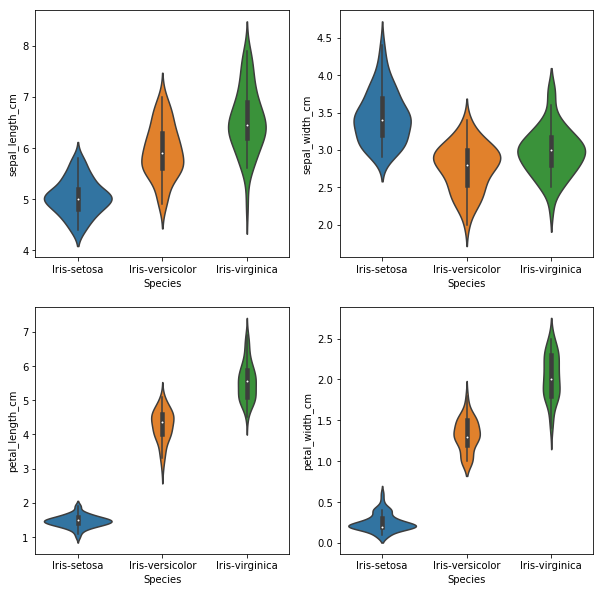

In [22]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'Species':
        continue
    #print('column_index=',column_index) column_index是0序
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='Species', y=column, data=iris_data_clean)

#### 至此，基本的数据清洗已完成，下一步就是对清洗后的数据作分类了。